In [254]:
# Read wide table from one drive
widecsv=read.csv("Fig. 3d SGI.csv", sep=",")
## change the name also in export file
#rotate from wide table to tall table
tallcsv <- stack(widecsv)

#change column name
names(tallcsv)[1] <- ("VALUE")
names(tallcsv)[2] <- ("Treatment")

#add new column for Trial
tallcsv$Trial <- "One"

#change different trial using each n of each trial
## Trial "One" max n: 6 // Trial "Two" max n: 6
### you can modify this "for loop" using rest of dividing 
for(i in 1:nrow(tallcsv))
  if(i%%37< 19 & i%%37 > 0){
    tallcsv[i,3] <- "One"
  } 
for(i in 1:nrow(tallcsv))
  if(i%%37 >= 19 | i%%37 == 0){
    tallcsv[i,3] <- "Two"
  } 
#delete NA row
tallcsv2 <- tallcsv[!is.na(tallcsv$VALUE),]
#change column location
tallcsv3 <- data.frame(tallcsv2[2],tallcsv2[1],tallcsv2[3])

#export
write.csv(tallcsv3,"Fig. 3d SGI_tall.csv", row.names = FALSE)



In [255]:
#load the required packages
library(car)
library(MASS)
library(stats)
library(sjPlot)
library(tidyverse)
library(lme4)
library(lmerTest)
library(LMERConvenienceFunctions)
library(multcomp)

In [256]:
#VALUEdata=read.csv(choose.files())
VALUEdata=read.csv("Fig. 3d SGI_tall.csv", sep=",")
VALUEdata$VALUE <- as.numeric(as.character(VALUEdata$VALUE))
print(head(VALUEdata))

    Treatment   VALUE Trial
1 X01_DMSO_WT   1.580   One
2 X01_DMSO_WT -12.867   One
3 X01_DMSO_WT  25.056   One
4 X01_DMSO_WT   2.483   One
5 X01_DMSO_WT   9.707   One
6 X01_DMSO_WT   7.901   One


[1] 127  26

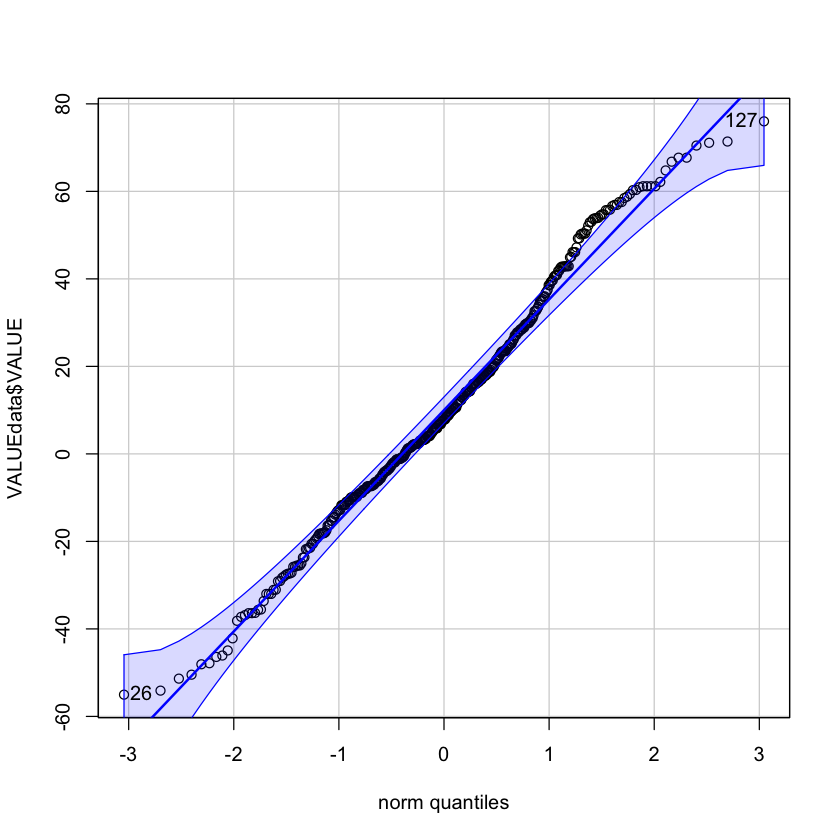

In [257]:
#Normal distribution
qqp(VALUEdata$VALUE, "norm")

Warning message:
“Model was not fitted by REML. Re-fitting model using REML, but p-values, df, etc. still might be unreliable.”


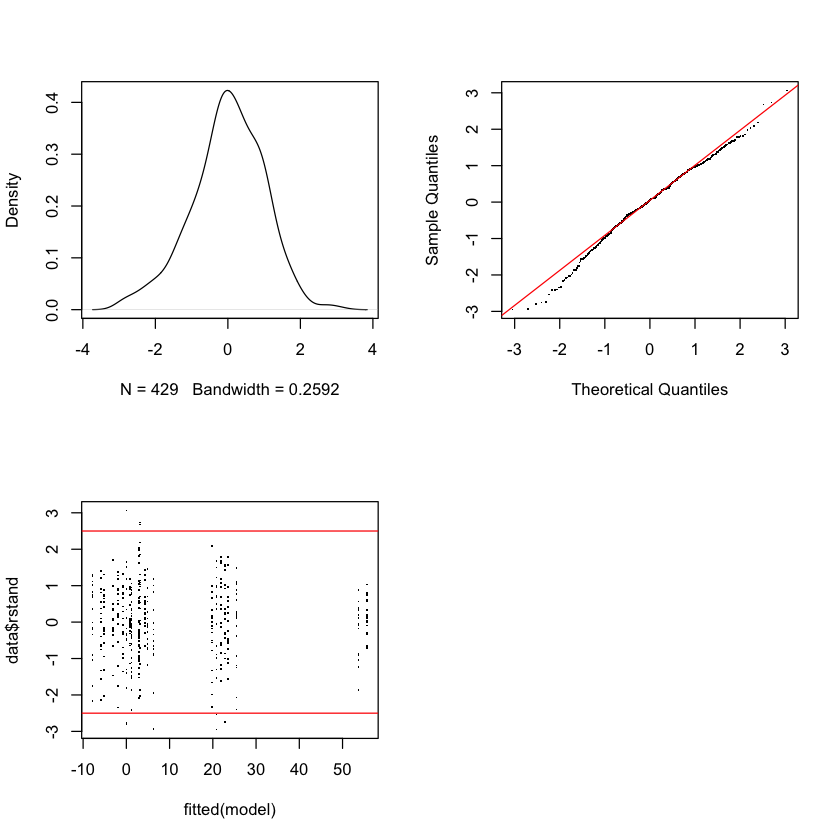

In [259]:
#set REML to FALSE if the data is normal, so we can use the maximum likelihood because the data are normal, we have similar sample sizes between effects, and we only have one random effect
VALUE.lmm<-lmer(VALUE ~ Treatment + (1|Trial), data = VALUEdata, REML = FALSE)
m<-lmer(VALUE ~ Treatment + (1|Trial), data = VALUEdata, REML = FALSE)
tab_model(m, p.val = "kr", show.df = TRUE)
#the density plot should look roughly normal, centered on 0. In the quantile plot the black dots should roughly mirror the red line. And in the fitted residual plot most black dots should be between the red lines, with no obvious skew from left to right.
mcp.fnc(VALUE.lmm)

In [262]:
#If the above looks good, then we can get the model characteristics
summary(VALUE.lmm)

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: VALUE ~ Treatment + (1 | Trial)
   Data: VALUEdata

     AIC      BIC   logLik deviance df.resid 
  3803.1   3859.9  -1887.5   3775.1      415 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.95196 -0.59906  0.05365  0.69805  3.06470 

Random effects:
 Groups   Name        Variance Std.Dev.
 Trial    (Intercept)   1.906   1.381  
 Residual             387.008  19.673  
Number of obs: 429, groups:  Trial, 2

Fixed effects:
                          Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)                -0.9599     3.4210  70.3040  -0.281    0.780    
TreatmentX02_Maya1_WT       4.8559     4.6699 427.0136   1.040    0.299    
TreatmentX03_Maya2_WT      22.7759     4.6369 426.9996   4.912 1.29e-06 ***
TreatmentX04_flg22_WT      55.6702     4.6369 426.9996  12.006  < 2e-16 ***
TreatmentX05_DMSO_bak1      2.8223     4.6369 426.9996   0.609

In [260]:
#anova analysis of lmm
aov <- anova(m)
print(summary(aov))
#Tukey's post-hoc, load library multcomp
tukey_result <- glht(m, linfct = mcp(Treatment = "Tukey"))
multcomps <- cld(tukey_result, alpha=0.1)
print(multcomps)
print(summary(tukey_result))

     Sum Sq          Mean Sq          NumDF        DenDF        F value     
 Min.   :120413   Min.   :10947   Min.   :11   Min.   :427   Min.   :28.29  
 1st Qu.:120413   1st Qu.:10947   1st Qu.:11   1st Qu.:427   1st Qu.:28.29  
 Median :120413   Median :10947   Median :11   Median :427   Median :28.29  
 Mean   :120413   Mean   :10947   Mean   :11   Mean   :427   Mean   :28.29  
 3rd Qu.:120413   3rd Qu.:10947   3rd Qu.:11   3rd Qu.:427   3rd Qu.:28.29  
 Max.   :120413   Max.   :10947   Max.   :11   Max.   :427   Max.   :28.29  
     Pr(>F)         
 Min.   :2.299e-44  
 1st Qu.:2.299e-44  
 Median :2.299e-44  
 Mean   :2.299e-44  
 3rd Qu.:2.299e-44  
 Max.   :2.299e-44  


Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”
Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”
Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”
Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”


     X01_DMSO_WT     X02_Maya1_WT     X03_Maya2_WT     X04_flg22_WT 
             "a"              "a"              "b"              "c" 
   X05_DMSO_bak1   X06_Maya1_bak1 X07_Maya2_bak1.5   X08_flg22_bak1 
             "a"              "a"              "b"              "b" 
   X09_DMSO_fls2   X10_Maya1_fls2   X11_Maya2_fls2   X12_flg22_fls2 
             "a"              "a"              "a"              "a" 


Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”
Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”
Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”
Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”
Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”
Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”



	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lmer(formula = VALUE ~ Treatment + (1 | Trial), data = VALUEdata, 
    REML = FALSE)

Linear Hypotheses:
                                       Estimate Std. Error z value Pr(>|z|)    
X02_Maya1_WT - X01_DMSO_WT == 0          4.8559     4.6699   1.040   0.9968    
X03_Maya2_WT - X01_DMSO_WT == 0         22.7759     4.6369   4.912    <0.01 ***
X04_flg22_WT - X01_DMSO_WT == 0         55.6702     4.6369  12.006    <0.01 ***
X05_DMSO_bak1 - X01_DMSO_WT == 0         2.8223     4.6369   0.609   1.0000    
X06_Maya1_bak1 - X01_DMSO_WT == 0        3.1154     4.6369   0.672   0.9999    
X07_Maya2_bak1.5 - X01_DMSO_WT == 0     25.4366     4.6369   5.486    <0.01 ***
X08_flg22_bak1 - X01_DMSO_WT == 0       21.8153     4.6369   4.705    <0.01 ***
X09_DMSO_fls2 - X01_DMSO_WT == 0        -3.1680     4.6369  -0.683   0.9999    
X10_Maya1_fls2 - X01_DMSO_WT == 0       -5.8443     4.6369  -1.260  